###**Ý nghĩa của phép tính convolution trên ảnh trong xử lý ảnh**
Mục đích của phép tính convolution trên ảnh là làm mờ, làm nét ảnh; xác định các đường;… Mỗi kernel khác nhau thì phép tính convolution sẽ có ý nghĩa khác nhau.

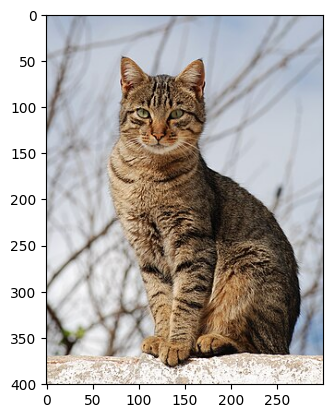

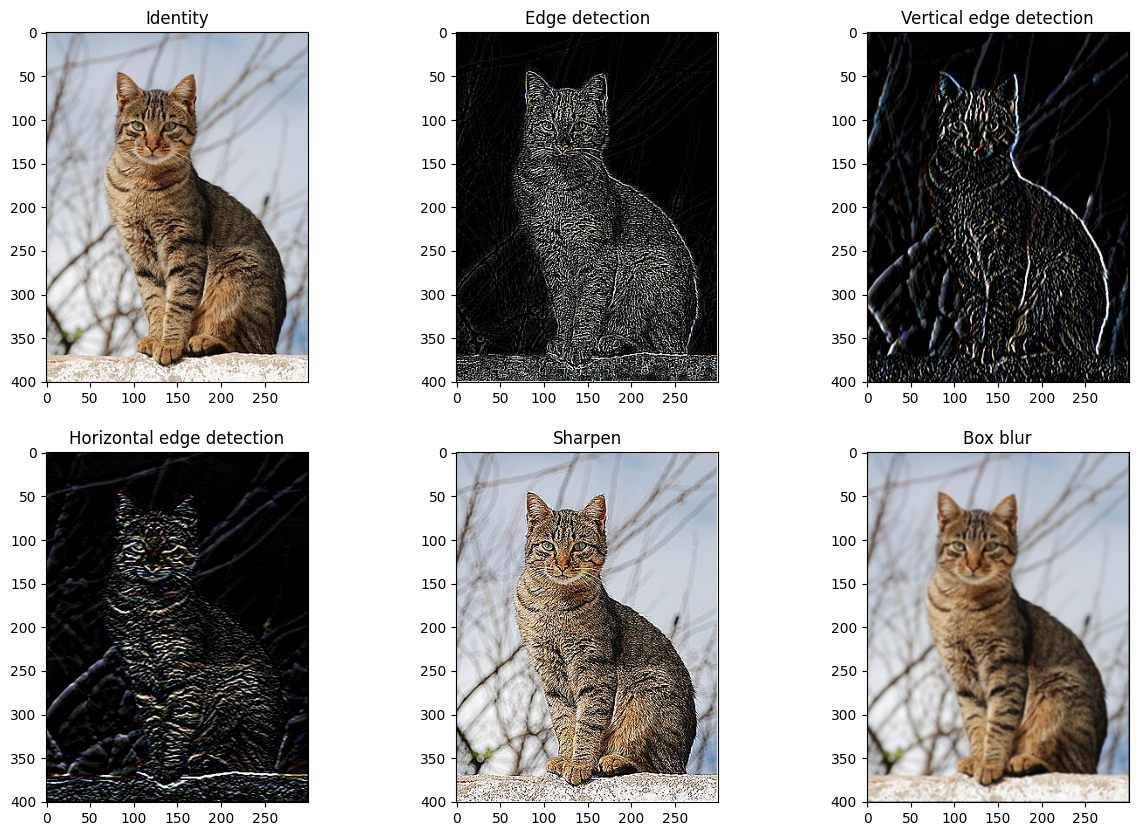

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

def apply_convolution(img: np.array, kernel: np.array, stride: int = 1, padding: int = 0):

    # Get the height, width, and number of channels of the image
    height, width, c = img.shape

    # Get the height, width of the kernel
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output image after applying convolution with given padding
    out_height = (height + 2 * padding - kernel_height) // stride + 1
    out_width = (width + 2 * padding - kernel_width) // stride + 1

    # Create a new image of size out_height x out_width x number of channels
    new_img = np.zeros((out_height, out_width, c))

    # Apply zero padding to the input image
    padded_img = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Loop through each pixel in the output image
    for i in range(0, out_height):
        for j in range(0, out_width):
            # Compute the starting point of the current window
            row_start = i * stride
            row_end = row_start + kernel_height
            col_start = j * stride
            col_end = col_start + kernel_width

            # Extract a window of pixels around the current pixel from the padded image
            window = padded_img[row_start:row_end, col_start:col_end]

            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[i, j, 0] = int((window[:, :, 0] * kernel).sum())
            new_img[i, j, 1] = int((window[:, :, 1] * kernel).sum())
            new_img[i, j, 2] = int((window[:, :, 2] * kernel).sum())

    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)

    return new_img.astype(np.uint8)

if __name__ == "__main__":

  # kernel for Identity
  kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

  # kernel for edge detection
  kernel2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

  # kernel for vertical edge detection
  kernel3 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

  # kernel for horizontal edge detection
  kernel4 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

  # kernel for sharpen
  kernel5 = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

  # Kernel for box blur
  kernel6 = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])

  # Open the image and convert it to an array
  urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/300px-Cat_November_2010-1a.jpg', 'meo.jpg')
  img = cv2.imread("meo.jpg")
  or_img = img.copy()

  # Tạo mảng chứa các bức ảnh convolution
  conv_kernel_names = ['Identity', 'Edge detection', 'Vertical edge detection', 'Horizontal edge detection', 'Sharpen', 'Box blur']
  conv_images = []

  for kernel in [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]:
    conv_img = apply_convolution(or_img, kernel, 1, 1)
    conv_img = cv2.cvtColor(conv_img, cv2.COLOR_BGR2RGB) # Chuyen thu tu mau tu BGR (CV2) -> RGB (matplotlib)
    conv_images.append(conv_img)

  plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB))
  # Hiển thị 6 ảnh bằng Matplotlib
  fig, axes = plt.subplots(2, 3, figsize=(15, 10))

  for i, ax in enumerate(axes.flat):
    ax.imshow(conv_images[i])
    ax.set_title(f"{conv_kernel_names[i]}")

  plt.show()


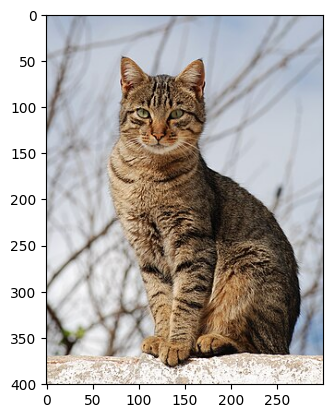

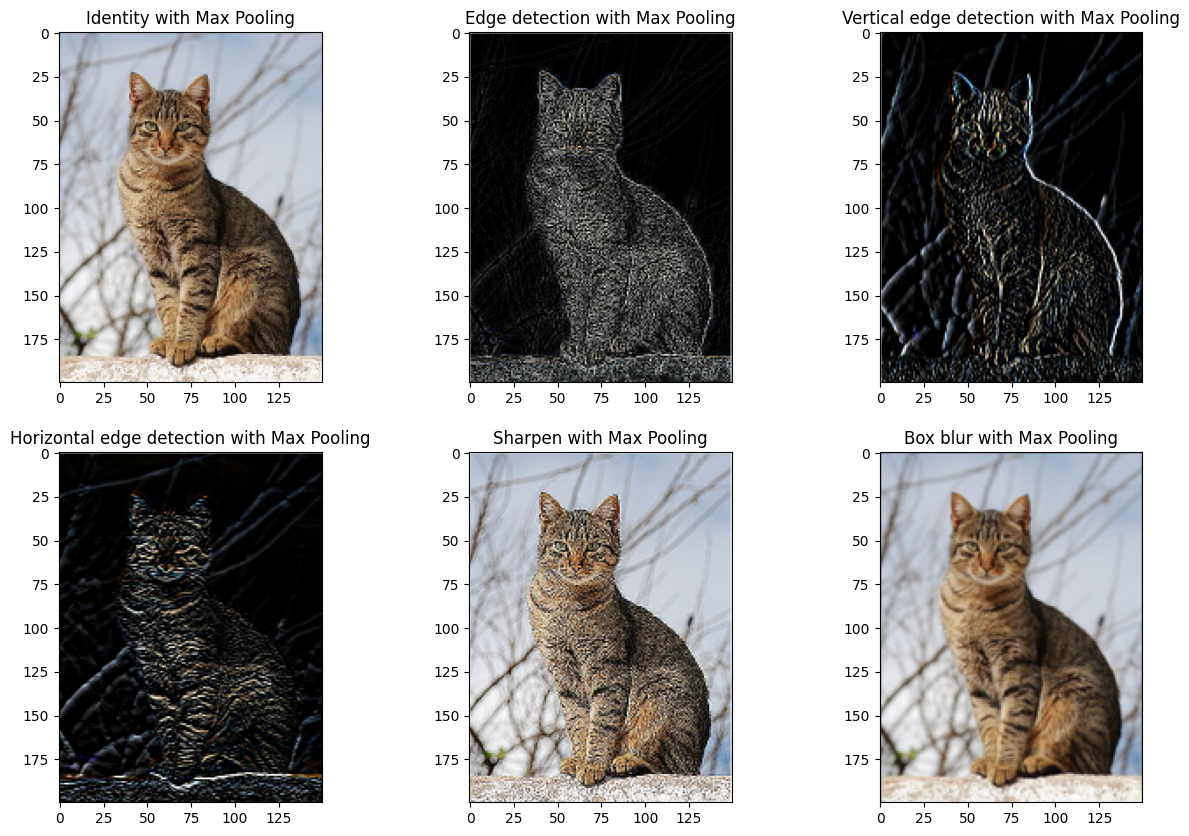

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

def apply_convolution(img: np.array, kernel: np.array, stride: int = 1, padding: int = 0):

  # Get the height, width, and number of channels of the image
  height, width, c = img.shape

  # Get the height, width of the kernel
  kernel_height, kernel_width = kernel.shape

  # Calculate the dimensions of the output image after applying convolution with given padding
  out_height = (height + 2 * padding - kernel_height) // stride + 1
  out_width = (width + 2 * padding - kernel_width) // stride + 1

  # Create a new image of size out_height x out_width x number of channels
  new_img = np.zeros((out_height, out_width, c))

  # Apply zero padding to the input image
  padded_img = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

  # Loop through each pixel in the output image
  for i in range(0, out_height):
      for j in range(0, out_width):
          # Compute the starting point of the current window
          row_start = i * stride
          row_end = row_start + kernel_height
          col_start = j * stride
          col_end = col_start + kernel_width

          # Extract a window of pixels around the current pixel from the padded image
          window = padded_img[row_start:row_end, col_start:col_end]

          # Apply the convolution to the window and set the result as the value of the current pixel in the new image
          new_img[i, j, 0] = int((window[:, :, 0] * kernel).sum())
          new_img[i, j, 1] = int((window[:, :, 1] * kernel).sum())
          new_img[i, j, 2] = int((window[:, :, 2] * kernel).sum())

  # Clip values to the range 0-255
  new_img = np.clip(new_img, 0, 255)

  return new_img.astype(np.uint8)

def apply_pooling(img: np.array, pool_size: int = 2, pool_type: str = 'max'):
  # Get the height, width, and number of channels of the image
  height, width, c = img.shape

  # Calculate the dimensions of the output image after applying pooling
  out_height = height // pool_size
  out_width = width // pool_size

  # Create a new image of size out_height x out_width x number of channels
  pooled_img = np.zeros((out_height, out_width, c))

  # Loop through each pixel in the output image
  for i in range(0, out_height):
      for j in range(0, out_width):
          # Compute the starting point of the current window
          row_start = i * pool_size
          row_end = row_start + pool_size
          col_start = j * pool_size
          col_end = col_start + pool_size

          # Extract a window of pixels around the current pixel
          window = img[row_start:row_end, col_start:col_end]

          # Apply pooling operation to the window
          if pool_type == 'max':
              pooled_img[i, j] = np.max(window, axis=(0, 1))
          elif pool_type == 'average':
              pooled_img[i, j] = np.mean(window, axis=(0, 1))

  return pooled_img.astype(np.uint8)

if __name__ == "__main__":

    # kernel for Identity
    kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

    # kernel for edge detection
    kernel2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    # kernel for vertical edge detection
    kernel3 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

    # kernel for horizontal edge detection
    kernel4 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

    # kernel for sharpen
    kernel5 = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

    # Kernel for box blur
    kernel6 = np.array([[1/9, 1/9, 1/9],[1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])

    # Open the image and convert it to an array
    urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/300px-Cat_November_2010-1a.jpg', 'meo.jpg')
    img = cv2.imread("meo.jpg")
    or_img = img.copy()

    # Tạo mảng chứa các bức ảnh convolution
    conv_kernel_names = ['Identity', 'Edge detection', 'Vertical edge detection', 'Horizontal edge detection', 'Sharpen', 'Box blur']
    conv_images = []

    for kernel in [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]:
        conv_img = apply_convolution(or_img, kernel, 1, 1)
        conv_img = cv2.cvtColor(conv_img, cv2.COLOR_BGR2RGB) # Chuyen thu tu mau tu BGR (CV2) -> RGB (matplotlib)

        # Apply pooling
        pooled_img = apply_pooling(conv_img, pool_size=2, pool_type='average')

        conv_images.append(pooled_img)
    plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB))
    # Hiển thị 6 ảnh bằng Matplotlib
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i, ax in enumerate(axes.flat):
        ax.imshow(conv_images[i])
        ax.set_title(f"{conv_kernel_names[i]} with Max Pooling")

    plt.show()


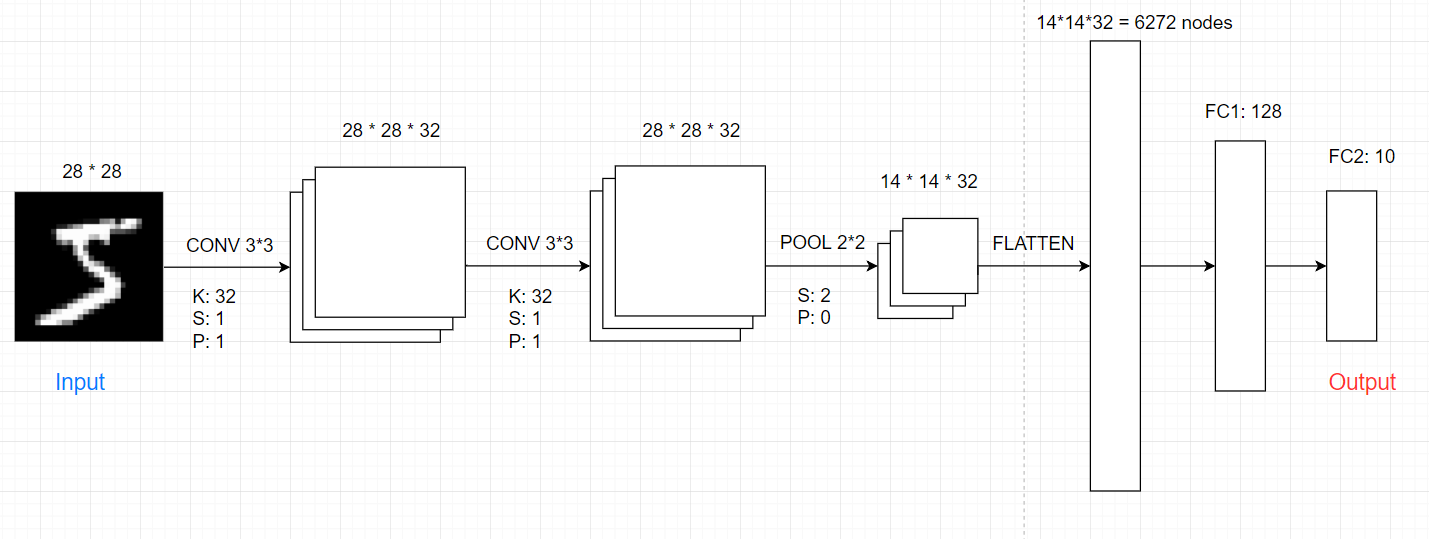

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as np_utils
from keras.datasets import mnist
import cv2

Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.

In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Bước này chuyển đổi one-hot encoding label Y của ảnh ví dụ số 5 thành vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]<br>
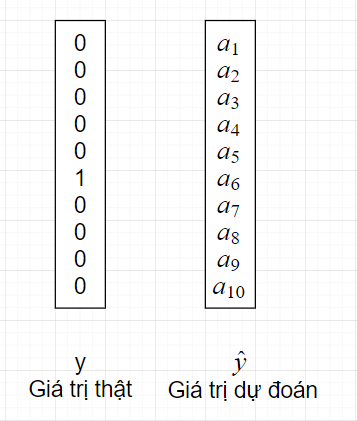

In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bước này định nghĩa model:

1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))

In [ ]:
# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), padding="same", activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), padding="same", activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 0.3523 - accuracy: 0.9087 - val_loss: 0.0743 - val_accuracy: 0.9791
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.0484 - val_accuracy: 0.9858
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0236 - accuracy: 0.9935 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0435 - val_accuracy: 0.9873
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.0430 - val_accuracy

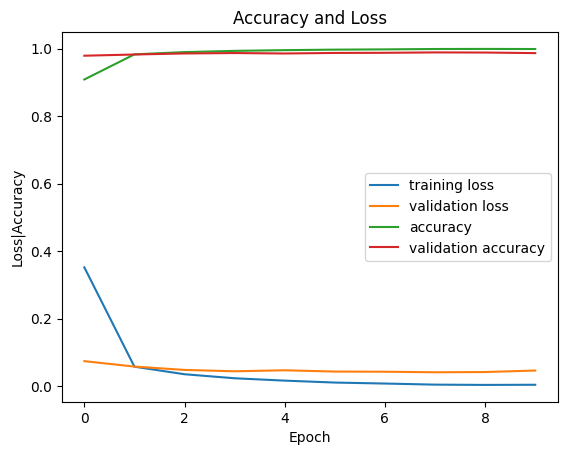

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04248065501451492, 0.9879999756813049]


Ta sẽ dùng kết quả đánh giá của mode với test set để làm kết quả cuối cùng của model. Tức model của chúng ta dữ đoán chữ số có độ chính xác 98.92% với MNIST dataset. Nghĩa là dự đoán khoảng 100 ảnh thì sai 1 ảnh.

1/1 [==============================] - 0s 35ms/step
Giá trị dự đoán:  6


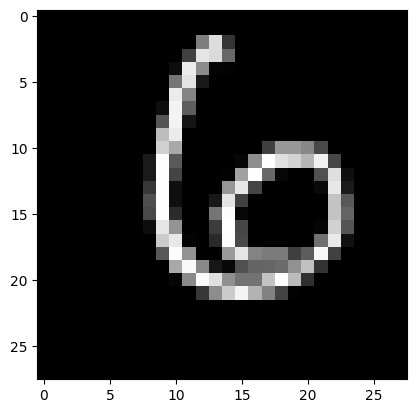

In [ ]:
# 10. Dự đoán ảnh
image = X_test[100]
plt.imshow(image.reshape(28,28), cmap='gray')

y_predict = model.predict(image.reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

1/1 [==============================] - 0s 65ms/step


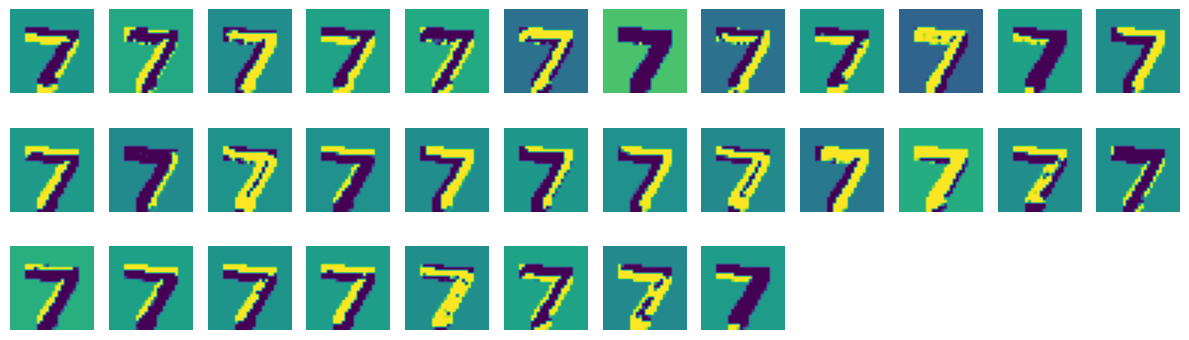

1/1 [==============================] - 0s 42ms/step


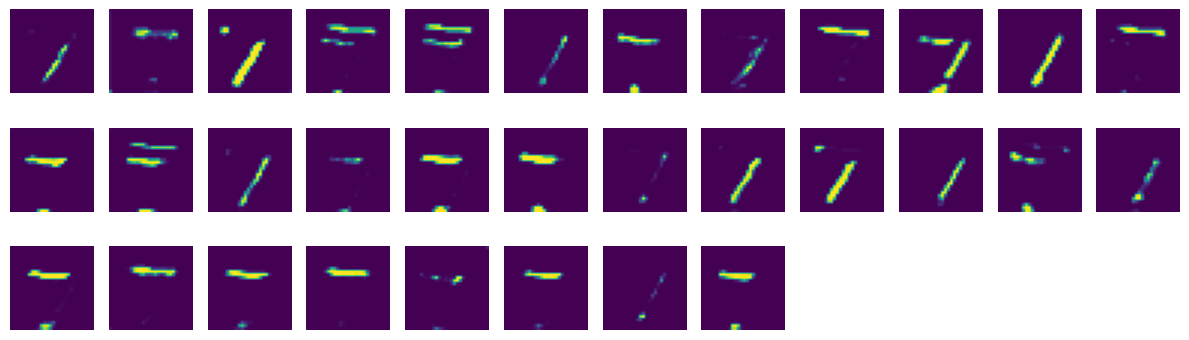

In [ ]:
# Hiển thị các feature maps qua mỗi lớp convolution của model CNN đã trained
for layer in model.layers:
    if isinstance(layer, Conv2D):
        # Lấy output của lớp Convolution
        intermediate_model = models.Model(inputs=model.inputs, outputs=layer.output)
        intermediate_output = intermediate_model.predict(np.expand_dims(image, axis=0))

        # Trực quan hóa output
        plt.figure(figsize=(12, 12))  # Kích thước của khung hình
        # Duyệt qua từng feature map và vẽ nó
        for i in range(intermediate_output.shape[3]):
            plt.subplot(10, 12, i+1)  # Tạo một subplot trong lưới 6x6, bắt đầu từ index 1
            plt.imshow(intermediate_output[0, :, :, i])
            plt.axis('off')

        plt.tight_layout()  # Căn chỉnh các subplot sao cho không chồng lên nhau
        plt.show()